# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнила студентка гр. 9382 Круглова Виктория, вариант 76.



# Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

# Основные теоретические положения

### Бинарный метод возведения числа в степень
Бинарный метод - метод возведения числа в степень $n \in N$. Степень представляется в двоичной системе счисления. Осуществляется просмотр бит от старшего к младшему, если бит равен единице, то возводим текущее число в квадрат и умножаем результат на исходное число. Если бит равн нулю, то текущее число возводится в квадрат.

Количество операций умножения равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в бинарном представлении числа.


### Метод множителей
Если степень $n \in N$ в которую нужно возвести число $a$, простая, то сначала возводим число в степень $n-1$, а затем домножаем на исходное.
Если же степень не простая, то представим степень как $n = i * j$, где $i$ - наименьший простой множитель числа n. После этого возведем число $a$ сначала в степень $i$, а затем результат в степень $j$.

### Аддитивная цепочка
Аддитивная цепочка длины $l$ - это такая последовательность $l+1$ натуральных чисел, в которой первое число $1$, а последующие получаются суммированием любых двух предыдущих.

### Алгоритм Яо

Выбираем число $k \in N \cup \{0\}$. 

Число $n$ записывается в виде $c_{j}*2^{jk} + ... + c_{2}*2^{2k} + c_{1}*2^{k} + c_0$, при этом $c_{j} \neq 0$. 

$d(z) = \sum_{i,c_{i}\neq z} 2^{ik}$

Цепочка Яо начинается с $1,2,4,8,...,2^{\lfloor lg n \rfloor}$, затем для каждого $z \in \{1,2,3,...,2^k-1\}$ считается $d(z)$. Если $d(z) \neq 0$ , то получаем $z*d(z)$ аналогично бинарному алгоритму умножения и записываем промежуточные значения в цепочку. В итоге получаем $n = d(1) + 2*d(2) + 3*d(3) + ... + (2^k - 1)d(2^k-1)$.

### Алгоритм Брауэра
Определим рекурретное соотношение с параметром $k \geq 2$:

\begin{equation}
    B_k(n) = 
    \begin{cases} 1, 2, 3, ..., 2^{k-1}:  n < 2^k \\ 
    B_k(q), 2q, 4q, 8q, ..., 2^kq, n:  n >= 2^k, q = \lfloor(n / 2^k) \rfloor
    \end{cases}
\end{equation}

При этом:

$n = \sum_{i=0}^{j} 2^{ik}c_{i}, c_{j} \neq 0$

Тогда цепочка будет иметь вид:

$B_k(n) = 1, 2, 3, ..., 2^k - 1, 2c_j, 4c_j, 8c_j,..., 2^kc_j, 2^kc_j + c_{j-1},...,n$

### Звездная аддитивная цепочка
Звёздная аддитивная цепочка - это цепочка, каждый элемент которой (кроме первого) получается путем сложения предыдущего и любого из цепочки. Т.е. $a_i = a_{i-1} + a_{j}$, где $1 \leqslant j \leqslant i$.

### Вектор индексов
Вектор индексов - это последовательность натуральных чисел. Для вектора длины $m-1$ можно построить звёздную аддитивную цепочку длины $m$. Каждый элемент в векторе индексов - это индекс $j$ элемента, который нужно прибавить к $a_{i-1}$ чтобы получить $(i+1)$-й элемент в звёздной цепочке.

### Алгоритм дробления вектора индексов
Алгоритм дробления вектора индексов нужен для нахождения для заданного числа $n$ звёздную аддитивную цепочку минимальной длины. 

Начинаем рассматривать аддитивные цепочки с длиной $m$, где $\underline{l}(n) \leqslant m \leqslant \bar{l}(n)$, при этом $\underline{l}(n) = \lfloor lb(n) \rfloor$ и $\bar{l}(n) = \lambda(n) + \nu(n) - 1$.

Выбираем $q: 1 \leqslant q \leqslant m - 1$. Пусть $q$ будет $m/2$. Затем перебираем все векторы индексов длины $q$, которые будут отвечать за первые элементы в аддитивной цепочке. Каждый такой вектор(назовем его $A$) дополняем до вектора длины $m$ двумя способами.

1) Чтобы получить минимальное значение в последнем элементе аддитивной цепочки. Т.е. надо добавить к $A$ вектор длины $m-q$ в котором все элементы будут равны 1.

2) Чтобы получить максимальное значение в последнем элементе аддитивной цепочки. Для этого надо добавить к $A$ вектор длины $m-q$ в котором все элементы будут равны своим индексам.

С помощью этих векторов мы строим аддитивные цепочки и получаем два значения $a_{max}$ и $a_{min}$. 

Если $a_{max}$ или $a_{min}$ равны $n$, то алгоритм заканчивается.

Если $n \in [a_{min},a_{max}]$ то начинаем перебирать вектора длины $m-q$, которые можно прибавить к $A$, чтобы по этому вектору можно было построить аддитивную цепочку, последний элемент которой равен $n$.

### Теорема Брауэра и следствие
Для некоторого $k < lb(lb(n))$ справедливо $l(n) < (1 + k^{-1})\lceil lb n \rceil + 2^{k-1} - k + 2$.

Следствие 1. Если $k = \lambda(\lambda(n)) - 2*\lambda(\lambda(\lambda(n)))$, 

то $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$


### Гипотеза Шольца-Брауэра
$l^{*}(2^n - 1) \leqslant l^{*}(n) + n - 1$

# Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

# Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для $1 < n\leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.

6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы


### 1.Бинарный метод и метод множителей
Реализация двух методов:

In [41]:
def binpow(x, power):
    res = x
    ops = 0
    seq = [1]
    binary = bin(power)[3:]
    for item in binary:
        if item == '1':
            res *= res
            seq.append(seq[-1]*2)
            res *= x
            seq.append(seq[-1] + 1)
            ops += 2
        else:
            res *= res
            seq.append(seq[-1]*2)
            ops += 1
    return [res, ops, seq]

In [40]:
def mul_method(x, power):
    leastPrimeDivider = factor(power)[0][0]
    res = [1,0]
    if leastPrimeDivider == power:
        leastPrimeDivider = factor(power-1)[0][0]
        res = [x,1]
    
    a = binpow(x, leastPrimeDivider)
    b = binpow(a[0], power // leastPrimeDivider)
    return [b[0]*res[0], a[1] + b[1] + res[1], a[2], b[2]]

Сравнение количества операций и последовательность степеней двух методов (бинарный и метод множителей) для числа 1:

|    |   Power |   Binary method ops |   Multiplication method ops | Pow seq for bin method                                                                                                        | Pow seq for mul method for x   | Pow seq for mul method for y=x^k                                                         |
|---:|--------:|--------------------:|----------------------------:|:------------------------------------------------------------------------------------------------------------------------------|:-------------------------------|:-----------------------------------------------------------------------------------------|
|  0 |      15 |                   6 |                           5 | [1, 2, 3, 6, 7, 14, 15]                                                                                                       | x - [1, 2, 3]                  | x^3 - [1, 2, 4, 5]                                                                       |
|  1 |     123 |                  11 |                           9 | [1, 2, 3, 6, 7, 14, 15, 30, 60, 61, 122, 123]                                                                                 | x - [1, 2, 3]                  | x^3 - [1, 2, 4, 5, 10, 20, 40, 41]                                                       |
|  2 |     658 |                  12 |                          12 | [1, 2, 4, 5, 10, 20, 40, 41, 82, 164, 328, 329, 658]                                                                          | x - [1, 2]                     | x^2 - [1, 2, 4, 5, 10, 20, 40, 41, 82, 164, 328, 329]                                    |
|  3 |     789 |                  13 |                          13 | [1, 2, 3, 6, 12, 24, 48, 49, 98, 196, 197, 394, 788, 789]                                                                     | x - [1, 2, 3]                  | x^3 - [1, 2, 4, 8, 16, 32, 64, 65, 130, 131, 262, 263]                                   |
|  4 |     935 |                  15 |                          15 | [1, 2, 3, 6, 7, 14, 28, 29, 58, 116, 232, 233, 466, 467, 934, 935]                                                            | x - [1, 2, 4, 5]               | x^5 - [1, 2, 4, 5, 10, 11, 22, 23, 46, 92, 93, 186, 187]                                 |
|  5 |    1087 |                  16 |                          16 | [1, 2, 4, 8, 16, 32, 33, 66, 67, 134, 135, 270, 271, 542, 543, 1086, 1087]                                                    | x - [1, 2]                     | x^2 - [1, 2, 4, 8, 16, 32, 33, 66, 67, 134, 135, 270, 271, 542, 543]                     |
|  6 |    2567 |                  15 |                          16 | [1, 2, 4, 5, 10, 20, 40, 80, 160, 320, 640, 641, 1282, 1283, 2566, 2567]                                                      | x - [1, 2, 4, 8, 16, 17]       | x^17 - [1, 2, 4, 8, 9, 18, 36, 37, 74, 75, 150, 151]                                     |
|  7 |    3014 |                  17 |                          17 | [1, 2, 4, 5, 10, 11, 22, 23, 46, 47, 94, 188, 376, 752, 753, 1506, 1507, 3014]                                                | x - [1, 2]                     | x^2 - [1, 2, 4, 5, 10, 11, 22, 23, 46, 47, 94, 188, 376, 752, 753, 1506, 1507]           |
|  8 |    5629 |                  21 |                          17 | [1, 2, 4, 5, 10, 20, 21, 42, 43, 86, 87, 174, 175, 350, 351, 702, 703, 1406, 1407, 2814, 5628, 5629]                          | x - [1, 2, 3, 6, 12, 13]       | x^13 - [1, 2, 3, 6, 12, 13, 26, 27, 54, 108, 216, 432, 433]                              |
|  9 |   46891 |                  24 |                          22 | [1, 2, 4, 5, 10, 11, 22, 44, 45, 90, 91, 182, 183, 366, 732, 1464, 1465, 2930, 5860, 5861, 11722, 23444, 23445, 46890, 46891] | x - [1, 2, 3, 6, 12, 13]       | x^13 - [1, 2, 3, 6, 7, 14, 28, 56, 112, 224, 225, 450, 900, 901, 1802, 1803, 3606, 3607] |

### Вывод
Как видно, в среднем метод множителей требует меньше операций, чем бинарный метод.

### 2. Алгоритм Яо

Реализация алгоритма:

In [46]:
def mult(d, z):
    seq = []
    seq.append(d)
    while seq[len(seq)-1] != z*d:
        check = false
        i = 1
        while(check != true):
            if seq[len(seq)-i] + seq[len(seq)-1] <= z*d:
                seq.append(seq[len(seq)-i] + seq[len(seq)-1])
                check = true
            else:
                i = i + 1
    return seq

def Yao(n, k):
    seq = []
    i = 1
    while i < n:
        seq.append(i)
        i = i << 1
    
    digits = n.digits(1 << k)
    
    j = 1
    last_d = []
    while j <= ((1 << k) - 1):
        d = 0
        for idx in range(len(digits)):
            if digits[idx] == j:
                d = d + (1 << k*idx)
        if d != 0:
            seq = seq + mult(d, j)
            last_d.append(seq[len(seq)-1])
        j = j + 1
    seq.append(sum(last_d))
    
    return seq  

Сравнение результатов алгоритма Яо (длины цепочек) с реальными минимальными длинами цепочек для чисел $n$. Также для каждого числа $n$ варьировался параметр $k$.

|    |    n  |    k  |   true min length |   Yao's length  | Yao's chain                                                                                                                |
|---:|------:|------:|------------------:|----------------:|:---------------------------------------------------------------------------------------------------------------------------|
|  0 |    37 |     2 |                 8 |              10 | [1, 2, 4, 8, 16, 32, 5, 16, 32, 37]                                                                                        |
|  1 |    37 |     3 |                 8 |              14 | [1, 2, 4, 8, 16, 32, 8, 16, 32, 1, 2, 4, 5, 37]                                                                            |
|  2 |    37 |     4 |                 8 |              13 | [1, 2, 4, 8, 16, 32, 16, 32, 1, 2, 4, 5, 37]                                                                               |
|  3 |    37 |     5 |                 8 |              12 | [1, 2, 4, 8, 16, 32, 32, 1, 2, 4, 5, 37]                                                                                   |
|  4 |    37 |     6 |                 8 |              15 | [1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32, 36, 37, 37]                                                                       |
|  5 |   111 |     2 |                10 |              14 | [1, 2, 4, 8, 16, 32, 64, 64, 16, 32, 5, 10, 15, 111]                                                                       |
|  6 |   111 |     3 |                10 |              18 | [1, 2, 4, 8, 16, 32, 64, 64, 8, 16, 32, 40, 1, 2, 4, 6, 7, 111]                                                            |
|  7 |   111 |     4 |                10 |              19 | [1, 2, 4, 8, 16, 32, 64, 16, 32, 64, 96, 1, 2, 4, 8, 12, 14, 15, 111]                                                      |
|  8 |   111 |     5 |                10 |              18 | [1, 2, 4, 8, 16, 32, 64, 32, 64, 96, 1, 2, 4, 8, 12, 14, 15, 111]                                                          |
|  9 |   111 |     6 |                10 |              19 | [1, 2, 4, 8, 16, 32, 64, 64, 1, 2, 4, 8, 16, 32, 40, 44, 46, 47, 111]                                                      |
| 10 |   552 |     2 |                12 |              13 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 276, 552, 552]                                                                     |
| 11 |   552 |     3 |                12 |              16 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 512, 8, 16, 32, 40, 552]                                                           |
| 12 |   552 |     4 |                12 |              17 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 272, 544, 1, 2, 4, 8, 552]                                                         |
| 13 |   552 |     5 |                12 |              21 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1, 2, 4, 8, 32, 64, 128, 256, 512, 544, 552]                                       |
| 14 |   552 |     6 |                12 |              22 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 64, 128, 256, 512, 1, 2, 4, 8, 16, 32, 40, 552]                                    |
| 15 |  1427 |     2 |                15 |              18 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1296, 64, 128, 1, 2, 3, 1427]                                                |
| 16 |  1427 |     3 |                15 |              21 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 520, 1040, 1, 2, 3, 64, 128, 256, 384, 1427]                                 |
| 17 |  1427 |     4 |                15 |              24 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1, 2, 3, 256, 512, 1024, 1280, 16, 32, 64, 128, 144, 1427]                   |
| 18 |  1427 |     5 |                15 |              25 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1024, 32, 64, 128, 256, 384, 1, 2, 4, 8, 16, 18, 19, 1427]                   |
| 19 |  1427 |     6 |                15 |              26 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1, 2, 4, 8, 16, 18, 19, 64, 128, 256, 512, 1024, 1280, 1408, 1427]           |
| 20 |  5328 |     2 |                16 |              18 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 5136, 64, 128, 192, 5328]                                        |
| 21 |  5328 |     3 |                16 |              20 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 4096, 520, 1040, 64, 128, 192, 5328]                             |
| 22 |  5328 |     4 |                16 |              24 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 4096, 256, 512, 1024, 16, 32, 64, 128, 192, 208, 5328]           |
| 23 |  5328 |     5 |                16 |              27 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 1024, 2048, 4096, 5120, 32, 64, 128, 192, 1, 2, 4, 8, 16, 5328]  |
| 24 |  5328 |     6 |                16 |              27 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 4096, 1, 2, 4, 8, 16, 64, 128, 256, 512, 1024, 1152, 1216, 5328] |

### Вывод
Алгоритм Яо не выдал цепочку минимальной длины при варьировании параметра $k$ для всех чисел выше, но при $k=2$ получались приемлемые результаты. При увеличении параметра $k$ длина цепочки возрастает.

### 3. Алгоритм дробления векторов
Реализация алгоритма:

In [49]:
import time

def dec_to_bin(x):
    binary = bin(x)
    return binary[2::]

def change_vector(idx_vector, q = 0):
    if(idx_vector == [1 for i in range(len(idx_vector))]):
        return [0 for i in range(len(idx_vector))]
    
    for i in range(len(idx_vector) -1, -1,-1):
        if(idx_vector[i] == 1):
            idx_vector[i] = i + q + 1
            continue
        idx_vector[i] -=1
        break
    return idx_vector

def check_vec_is_ones(idx_vector):
    for elem in idx_vector:
        if elem != 1:
            return false
    return true
            
def star_chain(idx_vec):
    chain = [1]
    for elem in idx_vec:
        chain.append(chain[len(chain)-1] + chain[elem-1])
    return chain
    
def vectors_split(n):
    start_time = time.time()
    res = []
    for m in range(floor(log(n,2).n()), dec_to_bin(n).count('1') + floor(log(n,2).n())):
        q = 0
        if m > 3:
            q = m // 2
        else:
            q = m
        idx_vec = [i for i in range(1, q+1)]
        while not check_vec_is_ones(idx_vec):
            length = m - q
            add_ones = [1 for j in range(1, length + 1)]
            add_max = [j + q for j in range(1, length + 1)]
            max_chain = star_chain(idx_vec + add_max)
            min_chain = star_chain(idx_vec + add_ones)
            a_max = max_chain[len(max_chain) - 1]
            a_min = min_chain[len(min_chain) - 1]
            
            if a_max == n:
                return (max_chain, time.time() - start_time)
            if a_min == n:
                return (min_chain, time.time() - start_time)
            
            if (n > a_min) and (n < a_max):
                while not check_vec_ones(add_max):
                    add_max = change_vector(add_max, q)
                    chain = star_chain(idx_vec + add_max)
                    if(chain[len(chain) - 1] == n):
                        return (chain, time.time() - start_time)
            idx_vec = change_vector(idx_vec)
        res = idx_vec
    return (star_chain(res), time.time() - start_time) 

Результат работы алгоритма. В таблице ниже сравнивается реальная длина минимальной цепочки и длина цепочки, которая была найдена алгоритмом.

|    |   N |   True min length |   Algorithm's length |      Time (sec) | Chain                                                  |
|---:|----:|------------------:|---------------------:|----------:|:-------------------------------------------------------|
|  0 | 501 |                13 |                   13 | 434.345   | [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]  |
|  1 | 522 |                12 |                   12 |   6.07846 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522]      |
|  2 | 556 |                13 |                   13 | 427.973   | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 544, 552, 556] |
|  3 | 623 |                13 |                   13 | 433.299   | [1, 2, 4, 8, 16, 32, 33, 66, 99, 131, 262, 524, 623]   |

### Вывод
С помощью алгоритма дробления векторов действительно можно получать минимальную цепочку. Но этот алгоритм требует много времени и вычислительных мощностей. Его целесообразно использовать для небольших $n$.

### 4. Проверка следствия 1 теоремы Брауэра

Подсчёт минимальных длин цепочек для $n=1..200$ и отображение аппроксимации.

In [60]:
def BrauerTheorem():
    res_data = []
    for i in range(1,201):
        res, t = vectors_split(i)
        res_data.append(len(res))
    return res_data

resBrauer = BrauerTheorem()    

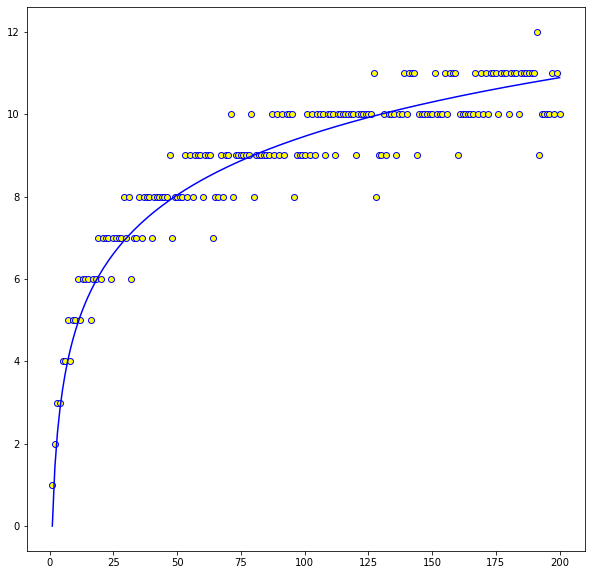

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

def model(t, coeffs):
    return np.log(t)*coeffs[0]

def helper(coeffs, y, t):
    return  y - model(t, coeffs)

def plotting():
    figure, axes = plt.subplots(figsize = (10,10))
    t = np.arange(1, 201)
    res = np.array(resBrauer)
    p, flag = leastsq(helper, 1, args=(res, t))
    plt.plot(t, res, 'o',  t, model(t, p), color='blue', markerfacecolor='yellow')

plotting()

### Вывод
Получившийся график соответствует графику логарифмической функции. Такая аппроксимация подтверждает теорему Брауэра. С увеличением $n$ из-за логарифмического роста, длина $l(n)$ будет медленно увеличиваться.

### 5. Гипотеза Шольца-Брауэра

In [77]:
def checkShcoltz():
    left = []
    right = []
    for i in range(2,11):
        first = vectors_split((1 << i) - 1)
        second = vectors_split(i)
        left.append(len(first[0]))
        right.append(len(second[0]) + i - 1)
    return [left, right]   
res = checkShcoltz()

|    |   N |   l^*(2^N-1) |   l^*(N) + i - 1 |
|---:|----:|-------------:|-----------------:|
|  0 |   2 |            3 |                3 |
|  1 |   3 |            5 |                5 |
|  2 |   4 |            6 |                6 |
|  3 |   5 |            8 |                8 |
|  4 |   6 |            9 |                9 |
|  5 |   7 |           11 |               11 |
|  6 |   8 |           11 |               11 |
|  7 |   9 |           13 |               13 |
|  8 |  10 |           14 |               14 |

### Вывод
Действительно, гипотеза справедлива для чисел $n\leqslant10$.

## Выводы
Было сформировано представление об аддитивных цепочках, также были рассмотрены и разработаны алгоритмы:
1. Бинарный метод
2. Метод множителей
3. Алгоритм Яо
4. Алгоритм дробления векторов

Были экспериментально доказаны следствие из теоремы Брауэра и гипотеза Шольца-Брауэра для $n \leqslant 10$.